In [11]:
import pandas as pd
import numpy as np


In [12]:
df = pd.read_csv("data/spam.csv", encoding="latin1")


In [13]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3650,ham,Want to send me a virtual hug?... I need one,NaN,NaN,NaN
1060,ham,I'm working technical support :)voice process....,NaN,NaN,NaN
1595,ham,Pls confirm the time to collect the cheque.,NaN,NaN,NaN
339,ham,U calling me right? Call my hand phone...,NaN,NaN,NaN
271,ham,"Night has ended for another day, morning has c...",NaN,NaN,NaN


## DATA CLEANING

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [16]:
df.head(1)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."


In [17]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [18]:
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
df['target']=le.fit_transform(df['target'])

In [21]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(403)

In [24]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

## EDA

In [25]:
!pip install matplotlib

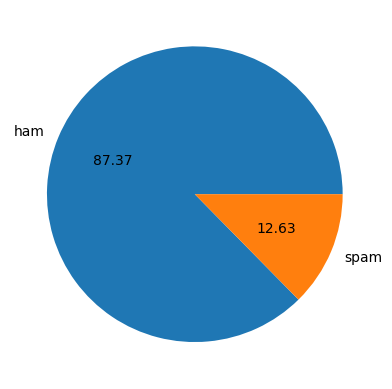

In [26]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [27]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')   # for newer NLTK versions



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/piyushmishra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/piyushmishra/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
df['num_characters']=df['text'].apply(len)

In [29]:
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head(5)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentencees']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head(5)

,target,text,num_characters,num_words,num_sentencees
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters','num_words','num_sentencees']].describe()

,num_characters,num_words,num_sentencees
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentencees']].describe()

,num_characters,num_words,num_sentencees
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentencees']].describe()

,num_characters,num_words,num_sentencees
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


# data preprocessing

In [50]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps=PorterStemmer()
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/piyushmishra/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)  

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))              
    return " ".join(y)

In [53]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps=PorterStemmer()
df['transformed_text']=df['text'].apply(transform_text)

In [54]:
df.head(5)

,target,text,num_characters,num_words,num_sentencees,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
spam_corpus=[]
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

In [58]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [59]:
ham_corpus=[]
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


# model building

In [77]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer()

In [78]:
X=tf.fit_transform(df['transformed_text']).toarray()

In [79]:
X.shape

(5169, 6708)

In [80]:
y=df['target'].values

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [82]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [84]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [85]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [86]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


# so bnb is working is giving good accuracy but the precision of mnb is best so we choose mnb-tfidf


In [88]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 2. Support Vector Machine (SVM)
from sklearn.svm import SVC
svc = SVC()

# 3. K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# 4. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# 5. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

models={
    'LR':lr,
    'svc':svc,
    'knn':knn,
    'dt':dt,
    'rt':rf
}

In [89]:
def train_classifier(models,X_train,X_test,y_train,y_test):
    
    models.fit(X_train,y_train)
    y_pred=models.predict(X_test)
    print(models)
    print(accuracy_score(y_test,y_pred))
    print(precision_score(y_test,y_pred))


In [90]:
for i in models:
    print("------------------")
    train_classifier(models[i],X_train,X_test,y_train,y_test)

------------------
LogisticRegression()
0.9477756286266924
0.9883720930232558
------------------
SVC()
0.9661508704061895
0.9813084112149533
------------------
KNeighborsClassifier()
0.9003868471953579
1.0
------------------
DecisionTreeClassifier()
0.9526112185686654
0.8156028368794326
------------------
RandomForestClassifier()
0.9738878143133463
0.9826086956521739


# improving the model-on seeing all the models we choose the best one mnb (multinomialNB) now hypertunning it to get more accurate model

In [103]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "alpha": [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    "fit_prior": [True, False],
    "force_alpha": [True, False]
}
grid = GridSearchCV(
    estimator=mnb,
    param_grid=param_grid,
    cv=5,
    scoring="precision",
    n_jobs=-1,
    verbose=2
)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ........alpha=0.1, fit_prior=True, force_alpha=True; total time=   0.4s
[CV] END .......alpha=0.1, fit_prior=True, force_alpha=False; total time=   0.4s
[CV] END .......alpha=0.1, fit_prior=True, force_alpha=False; total time=   0.4s
[CV] END ........alpha=0.1, fit_prior=True, force_alpha=True; total time=   0.4s
[CV] END ........alpha=0.1, fit_prior=True, force_alpha=True; total time=   0.4s
[CV] END .......alpha=0.1, fit_prior=True, force_alpha=False; total time=   0.4s
[CV] END .......alpha=0.1, fit_prior=True, force_alpha=False; total time=   0.4s
[CV] END .......alpha=0.1, fit_prior=True, force_alpha=False; total time=   0.4s
[CV] END ........alpha=0.1, fit_prior=True, force_alpha=True; total time=   0.4s
[CV] END ........alpha=0.1, fit_prior=True, force_alpha=True; total time=   0.4s
[CV] END .......alpha=0.1, fit_prior=False, force_alpha=True; total time=   0.1s
[CV] END .......alpha=0.1, fit_prior=False, for

/Users/piyushmishra/Desktop/SMSSPAM/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/piyushmishra/Desktop/SMSSPAM/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/piyushmishra/Desktop/SMSSPAM/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

[CV] END .......alpha=10.0, fit_prior=True, force_alpha=True; total time=   0.2s
[CV] END .......alpha=10.0, fit_prior=True, force_alpha=True; total time=   0.2s
[CV] END ......alpha=10.0, fit_prior=True, force_alpha=False; total time=   0.2s
[CV] END .......alpha=10.0, fit_prior=True, force_alpha=True; total time=   0.2s
[CV] END ......alpha=10.0, fit_prior=True, force_alpha=False; total time=   0.2s
[CV] END ......alpha=10.0, fit_prior=True, force_alpha=False; total time=   0.2s
[CV] END ......alpha=10.0, fit_prior=True, force_alpha=False; total time=   0.2s
[CV] END ......alpha=10.0, fit_prior=False, force_alpha=True; total time=   0.1s
[CV] END ......alpha=10.0, fit_prior=True, force_alpha=False; total time=   0.2s
[CV] END ......alpha=10.0, fit_prior=False, force_alpha=True; total time=   0.1s
[CV] END ......alpha=10.0, fit_prior=False, force_alpha=True; total time=   0.1s
[CV] END ......alpha=10.0, fit_prior=False, force_alpha=True; total time=   0.1s
[CV] END ......alpha=10.0, f

In [104]:
y4_pred=grid.predict(X_test)
print(accuracy_score(y_test,y4_pred))
print(confusion_matrix(y_test,y4_pred))
print(precision_score(y_test,y4_pred))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0
